# PIMA Diabetes data Exploration

In this notebook we will make EDA of diabetes dataset. The data we will use for this particular activity is from www.kaggle.com/PIMA-indian-diabetes-database.

## Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [3]:
data = pd.read_csv('diabetes.csv')

## Basic of data

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

There are 768 records with 9 attributes

## Data Manipulation
Missing values dection and handling

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It is now clear that there are no missing value in the dataframe and all the attributes are numerical which is good for modeling

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


describe() gives a comprehensive report of the dataframe
1.   The Age range is 21 to 81
2.   we have to find more about the minimum values of different attributes like Blood Pressure and BMI etc. it mean that 0 will be considered as missing value for these attributes



In [8]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling Missing Values


In [10]:
data['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

Replace 0's with nan

In [11]:
from numpy import nan

data['Glucose'] = data['Glucose'].replace(0,np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0,np.nan)
data['Insulin'] = data['Insulin'].replace(0,np.nan)
data['BMI'] = data['BMI'].replace(0,np.nan)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Blood Pressure and BMI have less misssing values than Skin Thickness and Insulin.

we will impute these missing values with median of relevent column at the null values

In [15]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [16]:
data.fillna(data.median(),inplace=True)

In [17]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outlier Detection'

#### Box plot to setect the outliers

<Axes: ylabel='Age'>

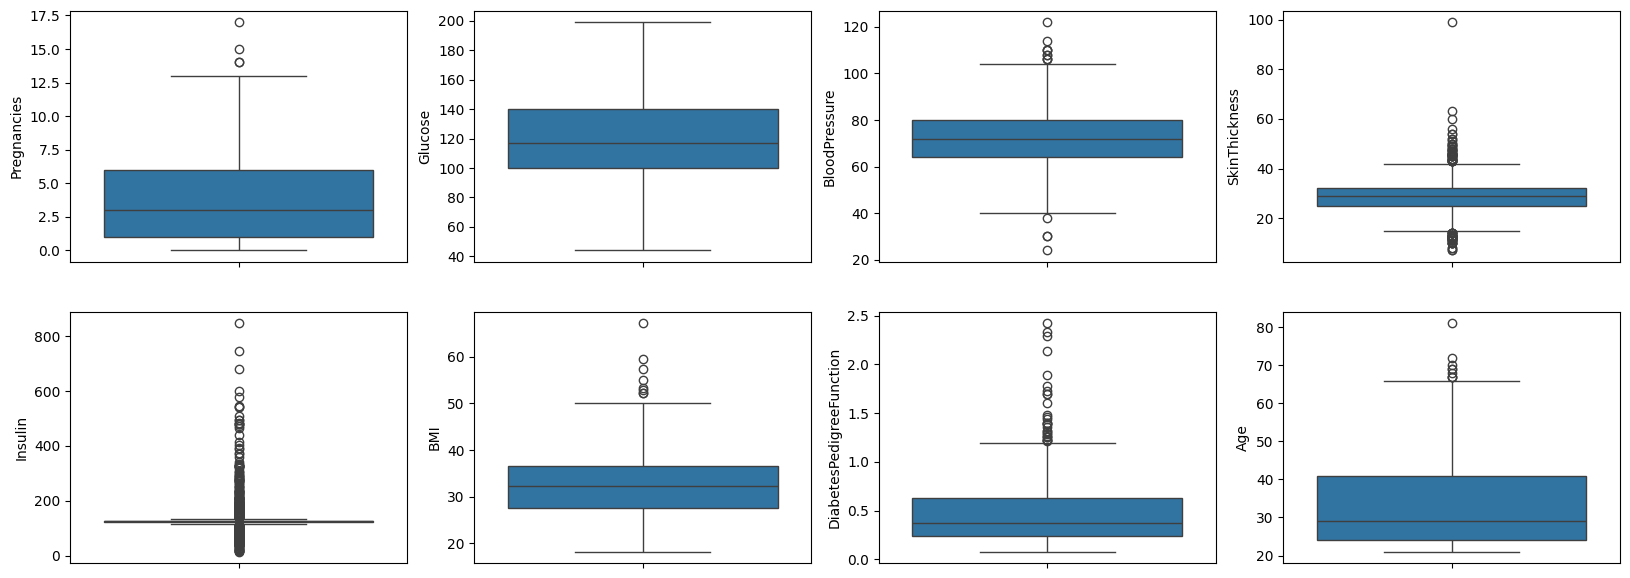

In [18]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])


Except Glucose all the columns have outliers

In [19]:
data['Pregnancies'] = data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05) ,upper=data['Pregnancies'].quantile(0.95))
data['Glucose'] = data['Glucose'].clip(lower=data['Glucose'].quantile(0.05) ,upper=data['Glucose'].quantile(0.95))
data['BloodPressure'] = data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05) ,upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness'] = data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05) ,upper=data['SkinThickness'].quantile(0.95))
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.05) ,upper=data['Insulin'].quantile(0.95))
data['BMI'] = data['BMI'].clip(lower=data['BMI'].quantile(0.05) ,upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05) ,upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age'] = data['Age'].clip(lower=data['Age'].quantile(0.05) ,upper=data['Age'].quantile(0.95))

<Axes: ylabel='Age'>

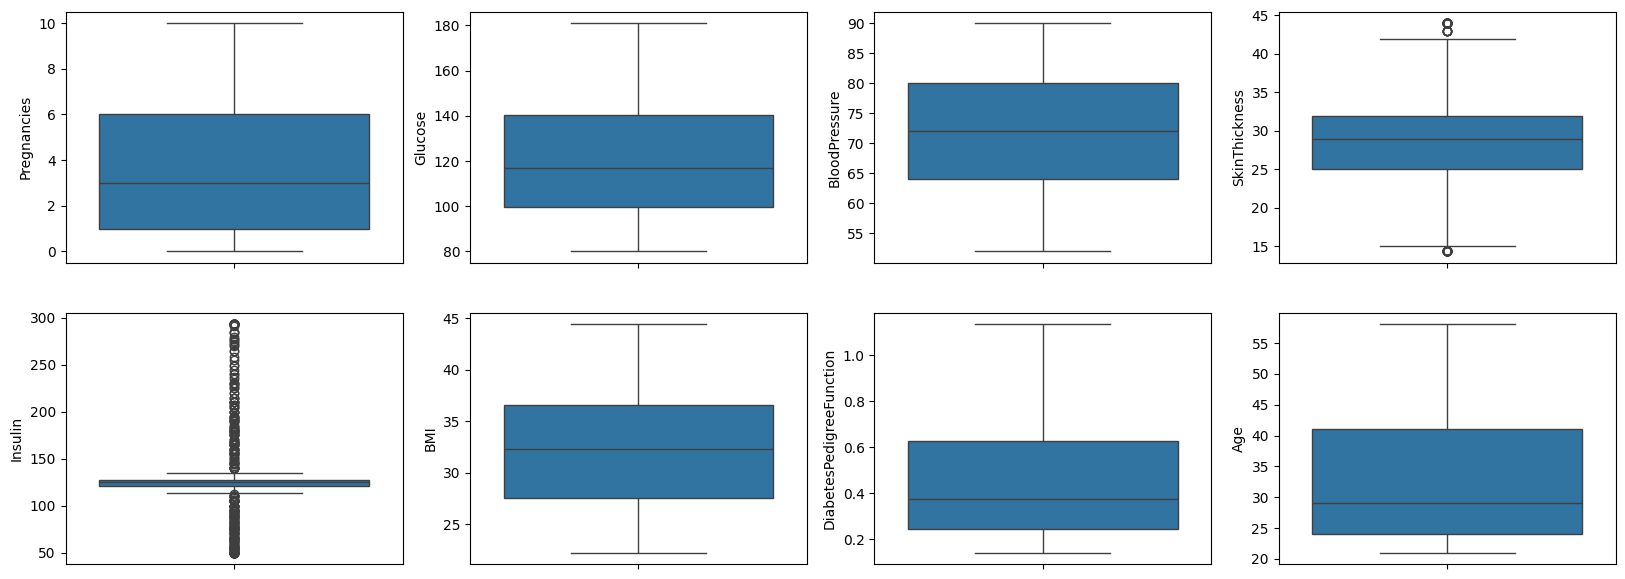

In [20]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])


We have outlier left only in Skin thickness and Inculin

In [21]:
data['SkinThickness'] = data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.08) ,upper=data['SkinThickness'].quantile(0.92))
data['Insulin'] = data['Insulin'].clip(lower=data['Insulin'].quantile(0.25) ,upper=data['Insulin'].quantile(0.75))

<Axes: ylabel='Age'>

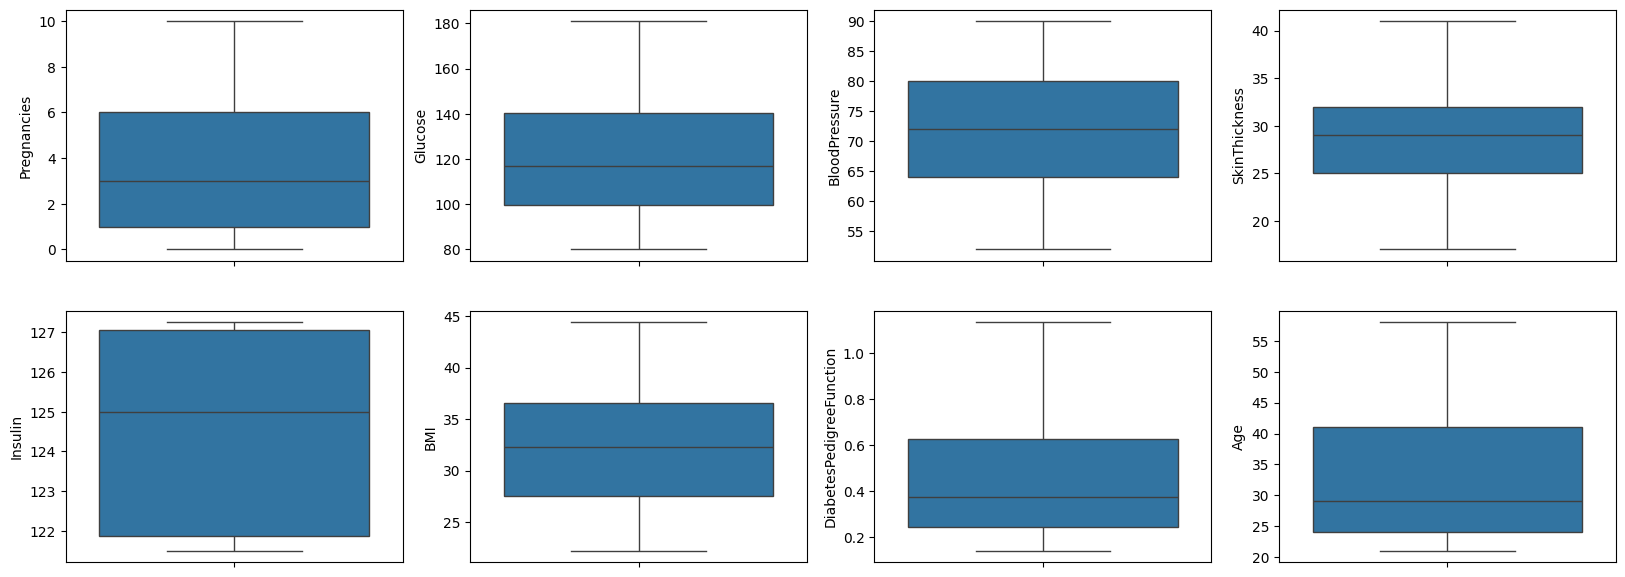

In [22]:
plt.figure(figsize=(20,15))

plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])


Now our data is free of outliers

## Visualization

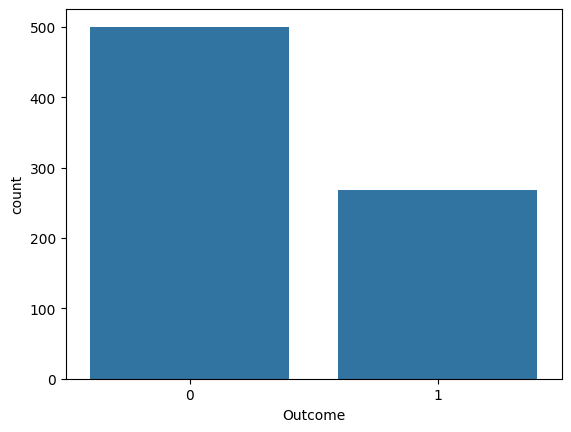

In [23]:
# Diabetic or not
sns.countplot(x = data['Outcome'])
plt.ylabel = 'Count'


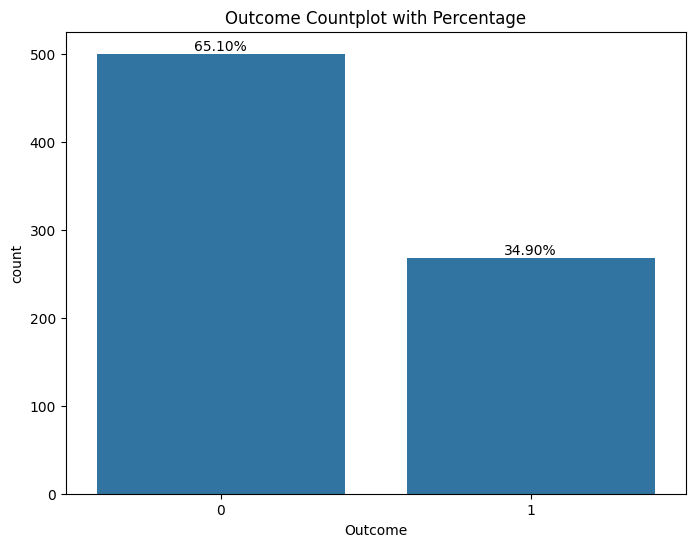

In [24]:


plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Outcome', data=data)
plt.title('Outcome Countplot with Percentage')
plt.xlabel('Outcome')

# Annotate with percentages
total = len(data['Outcome'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### Correalltion plot/ Heatmap

<Axes: >

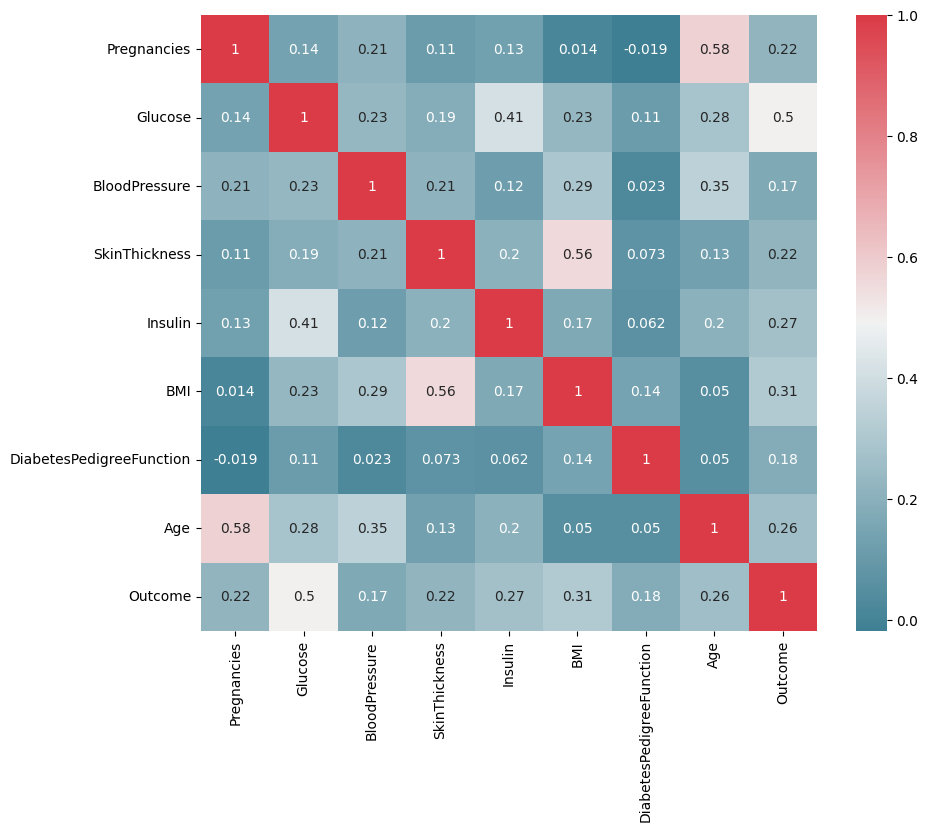

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr('pearson')

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax,
            annot = True)

*   Outcome is mmost correated to Glucose, BMI Insulin and Age
*   Pragnancies and Skin thichness are moderatly correlated with outccome
*   DiabetetesPedigreeFunction and BloodPressure are least correlated to Outcome

#### Pairplot

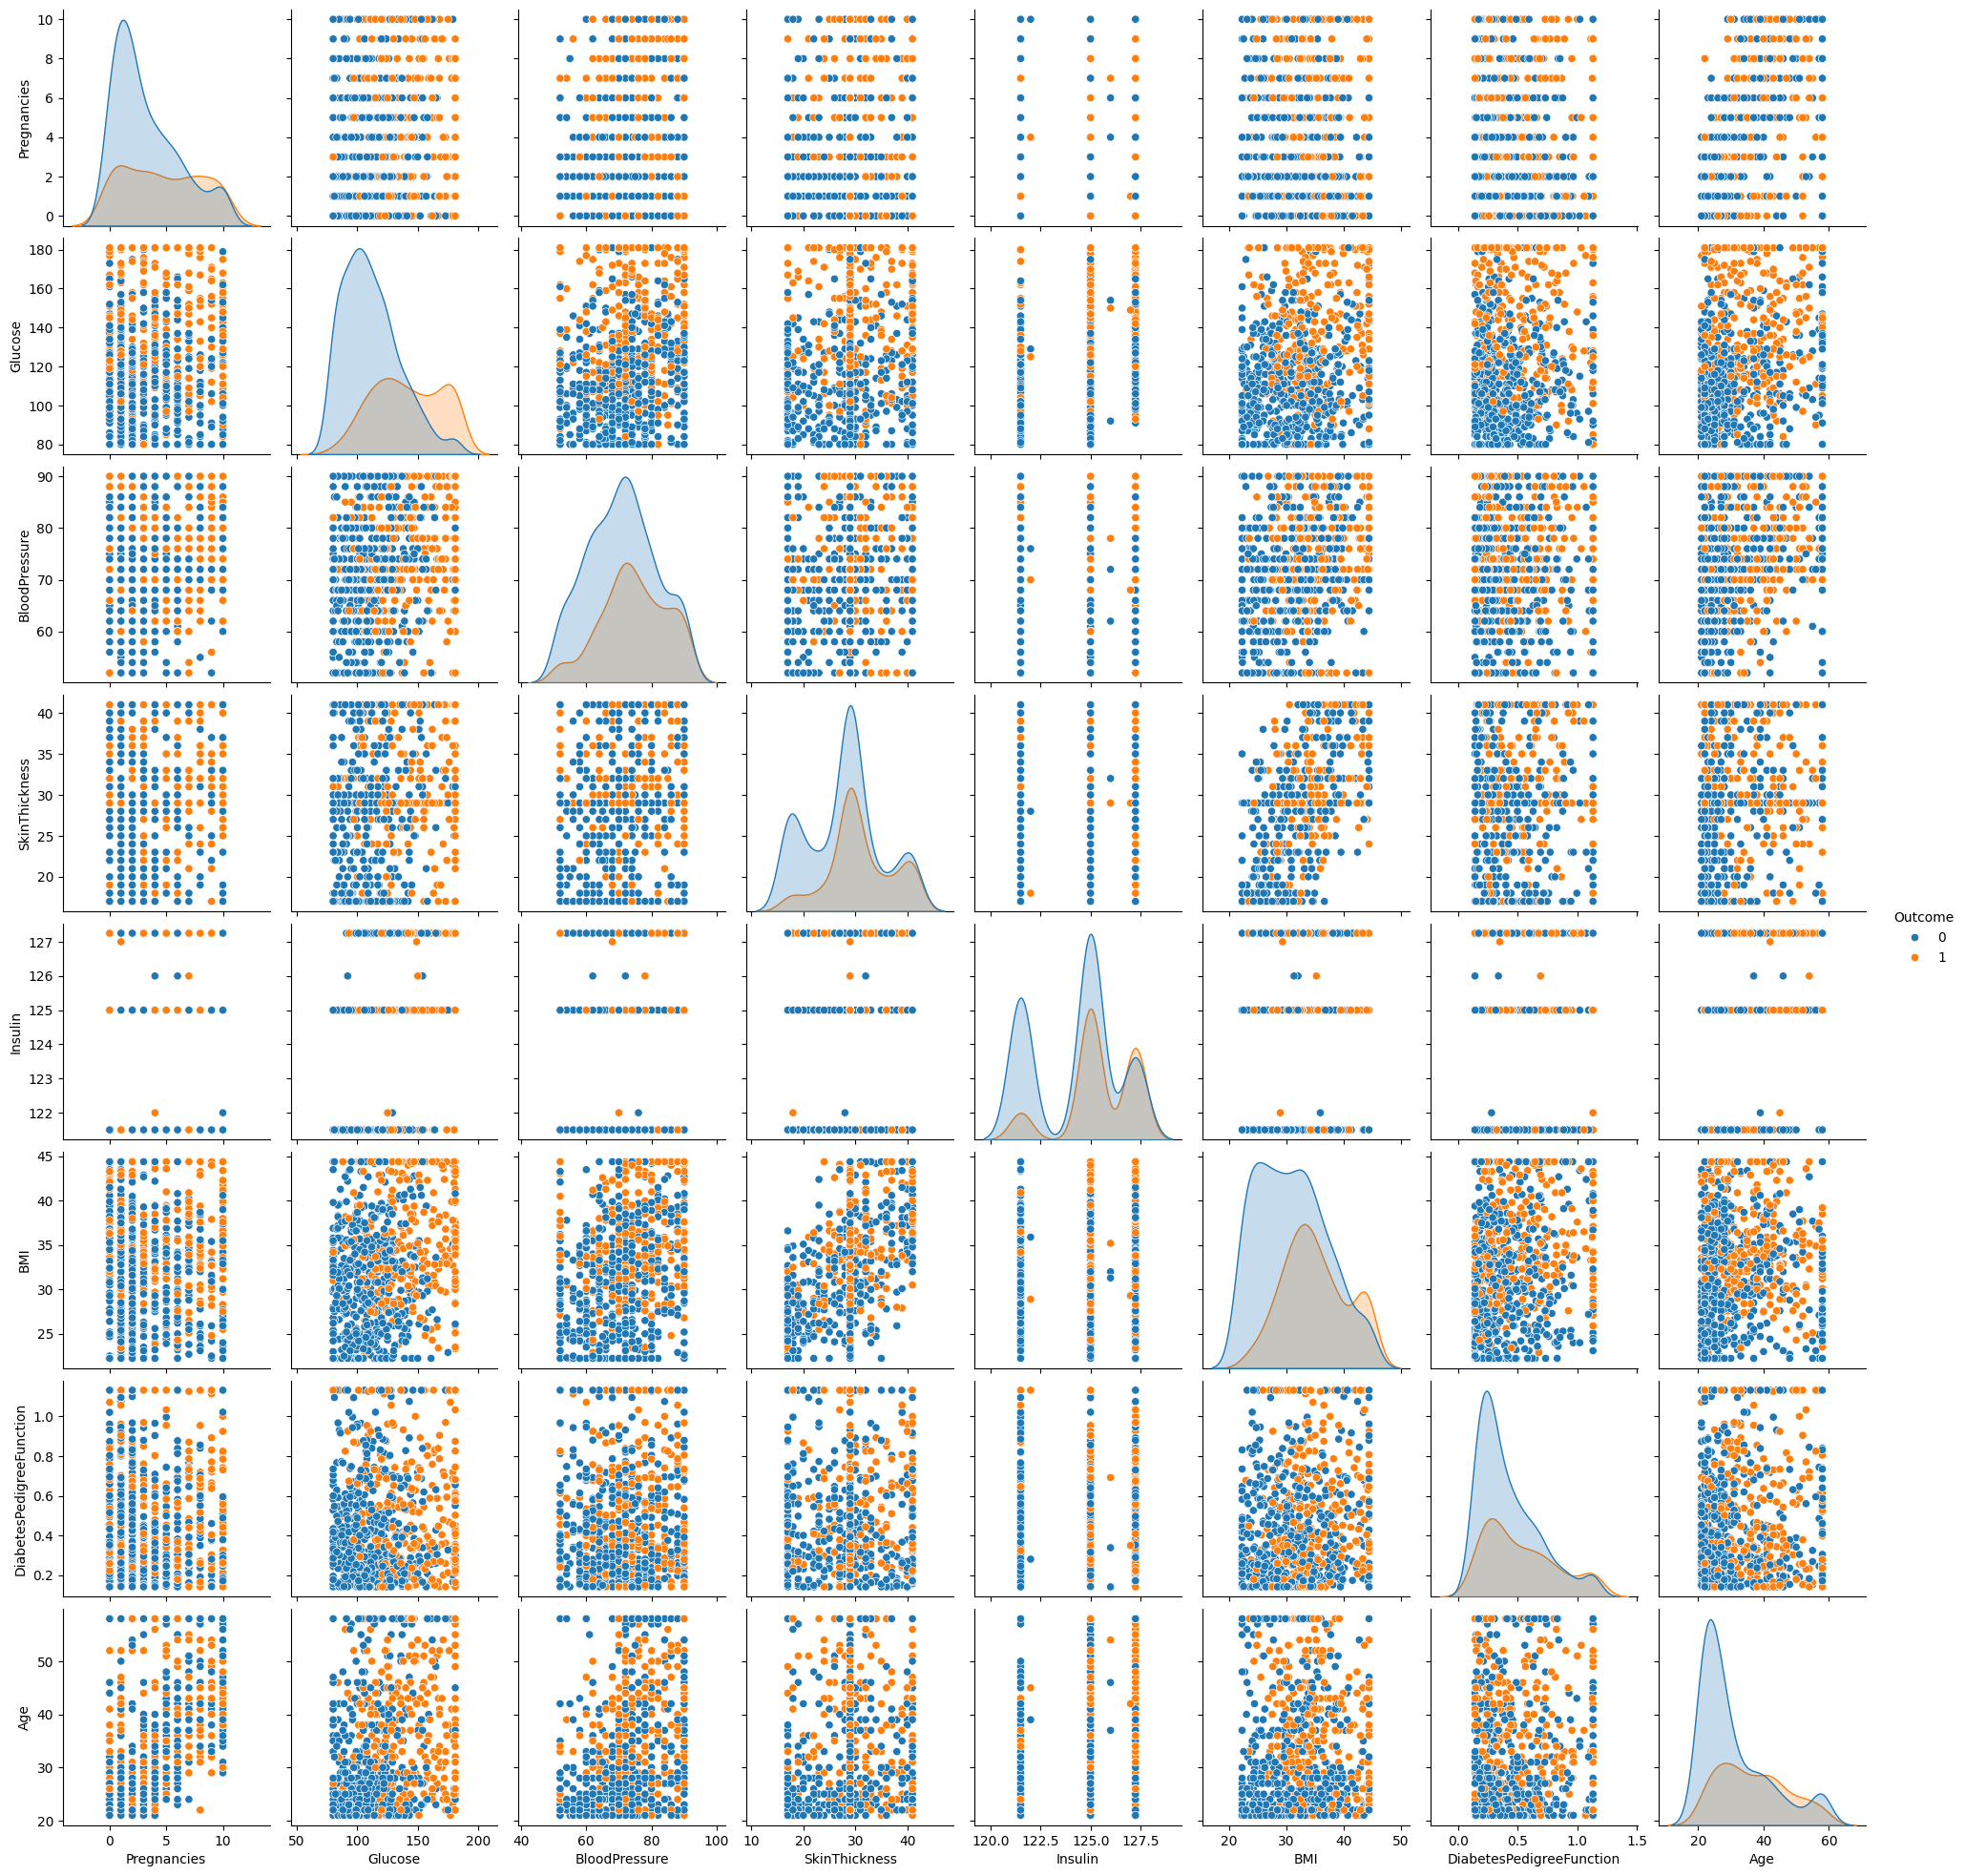

In [26]:
# prompt: generate the pairplot of all attributes with outcome as hue diag_kind = kde

sns.pairplot(data, hue='Outcome', diag_kind='kde')

Insights from the pairplot:
1. We can infer that most of the predictor variables are weak predictors of outcome
2. The kernel density plots suggests that the distribution for diabetic and non diabetic are very similar and are overlapping each other significantly, hence they wont be able to differentiate the diabetec and non diabetics patients clearly
3. Scatterplot also show poor correlation among data. Hence models built on this data might not be able to identify any patterns or might identify incorrent patterns.
4. the plot shows that there is some relationship between parameters. Outcome is added as hue then we can see blue and orange are overlap.
5. Pregnancies and age have some kind of linear line.
6. BloodPressure and age have little relation. Most of the aged people have BloodPressure.
7. Insulin and Glucose are somehow related